<a href="https://colab.research.google.com/github/cocoisland/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/module2-backpropagation/LS_DS_432_Backprop_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backpropagation Practice

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [0]:
class Neural_Network(object):
  def __init__(self):
    self.inputs = 3
    self.hiddenNodes = 4
    self.outputNodes = 1

    # Initlize Weights
    self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) # (3x4)
    self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes) # (4x1)

  def feed_forward(self, X):
    # Weighted sum between inputs and hidden layer
    self.hidden_sum = np.dot(X, self.L1_weights)
    # Activations of weighted sum
    self.activated_hidden = self.sigmoid(self.hidden_sum)
    # Weighted sum between hidden and output
    self.output_sum = np.dot(self.activated_hidden, self.L2_weights)
    # final activation of output
    self.activated_output = self.sigmoid(self.output_sum)
    return self.activated_output
    
  def sigmoid(self, s):
    return 1/(1+np.exp(-s))
  
  def sigmoidPrime(self, s):
    return s * (1 - s)
  
  def backward(self, X, y, o):
    # backward propgate through the network
    self.o_error = y - o # error in output
    self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

    self.z2_error = self.o_delta.dot(self.L2_weights.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden) # applying derivative of sigmoid to z2 error

    self.L1_weights += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.L2_weights += self.activated_hidden.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights
    
  def train (self, X, y):
    o = self.feed_forward(X)
    self.backward(X, y, o)

In [0]:
import numpy as np
np.random.seed(1)

# X = (hours studying, hours sleeping), y = score on test
X = np.array(([0,0,1],[0,1,1],[1,0,1],[0,1,0],[1,0,0],[1,1,1],[0,0,0]), dtype=float)
y = np.array(([0],[1],[1],[1],[1],[0],[0]), dtype=float)


In [3]:
NN = Neural_Network()
for i in range(1000): # trains the NN 1,000 times
  if i+1 in [1,2,3,4,5] or (i+1) % 50 == 0:
    print('+---------- EPOCH', i+1, '-----------+')
    print("Input: \n", X) 
    print("Actual Output: \n", y)  
    print("Predicted Output: \n" + str(NN.feed_forward(X))) 
    print("Loss: \n" + str(np.mean(np.square(y - NN.feed_forward(X))))) # mean sum squared loss
    print("\n")
  NN.train(X, y)

+---------- EPOCH 1 -----------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output: 
[[0.6085491 ]
 [0.67987193]
 [0.59190328]
 [0.58737534]
 [0.43434821]
 [0.67245612]
 [0.41670933]]
Loss: 
0.2507745536252601


+---------- EPOCH 2 -----------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output: 
[[0.60571618]
 [0.68147477]
 [0.59781554]
 [0.59108426]
 [0.44510504]
 [0.6772189 ]
 [0.41631019]]
Loss: 
0.248166125341833


+---------- EPOCH 3 -----------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output: 
[[0.60177983]
 [0.68201444]
 [0.60214001]
 [0.59345466]
 [0.45422185]
 [0.68065578]
 [0.41469106]]
Loss: 
0.2457086042973095


+-

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [15]:
# Tensorflow and Keras API to import and download the MNIST dataset 
# MNIST - 60,000 training images and 10,000 testing, 
# X train - RBG greyscale (0-255)
# y train - labe 0-9


import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [14]:
x_train.shape

(60000, 28, 28)

8


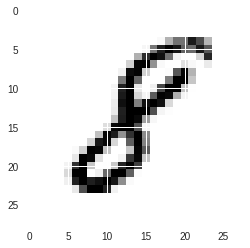

In [23]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')


In [25]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [26]:
# Building convolutional neural network
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
# Compile and fit the model
# adam optimizer is usually out-performs the other optimizers. 

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 59s 982us/step - loss: 0.1989 - acc: 0.9407
Epoch 2/10
60000/60000 [==============================] - 60s 997us/step - loss: 0.0799 - acc: 0.9754
Epoch 3/10
60000/60000 [==============================] - 57s 955us/step - loss: 0.0540 - acc: 0.9826
Epoch 4/10
60000/60000 [==============================] - 57s 953us/step - loss: 0.0414 - acc: 0.9867
Epoch 5/10
60000/60000 [==============================] - 57s 953us/step - loss: 0.0342 - acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 57s 954us/step - loss: 0.0280 - acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 59s 977us/step - loss: 0.0231 - acc: 0.9923
Epoch 8/10
60000/60000 [==============================] - 57s 954us/step - loss: 0.0192 - acc: 0.9934
Epoch 9/10
60000/60000 [==============================] - 57s 952us/step - loss: 0.0201 - acc: 0.9933
Epoch 10/10
60000/60000 [=========

In [28]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 270us/step


[0.06118579938681469, 0.9862]

5


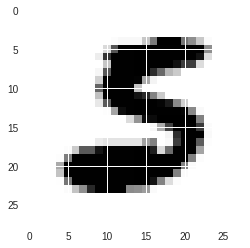

In [33]:
image_index = 7777
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [6]:
#http://rasbt.github.io/mlxtend/user_guide/data/mnist_data/

from mlxtend.data import mnist_data
X, y = mnist_data()

print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))

Dimensions: 5000 x 784


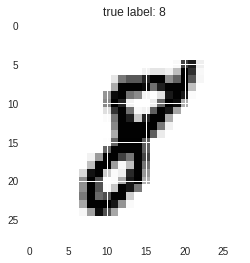

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()
plot_digit(X, y, 4000)     

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?